In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

Quantity_per_Chrono = pd.read_excel('python_2_All_Pottery_Totals_per_Chrono_Qty.xlsx')
Weight_per_Chrono = pd.read_excel('python_3_All_Pottery_Totals_per_Chrono_Wt.xlsx')
Fine_quantity = pd.read_excel('2a_Fine_Pottery_Totals_per_Chrono_Qty.xlsx')
Medium_quantity = pd.read_excel('2b_MedCoarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Coarse_quantity = pd.read_excel('2c_Coarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Fine_weight = pd.read_excel('3a_Fine_Pottery_Totals_per_Chrono_Wt.xlsx')
Medium_weight = pd.read_excel('3b_MedCoarse_Pottery_Totals_per_Chrono_Wt.xlsx')
Coarse_weight = pd.read_excel('3c_Coarse_Pottery_Totals_per_Chrono_Wt.xlsx')

time_period_columns = ['05_Neo', '25_EBA', '35_MBA', '45_LBA', '55_PG']



def classify_region(grsu):
    x = grsu[:2]
    y = int(grsu[2:5])
    if x >= 'LA' and x <= 'LI':
        return 'Northwest'
    elif x >= 'LK' and x <= 'LX' and y >= 782 and y <= 799:
        return 'Northeast'
    elif x >= 'LK' and x <= 'LS' and y >= 769 and y <= 780:
        return 'South'


for df in [Quantity_per_Chrono, Weight_per_Chrono, Fine_quantity, Fine_weight, Medium_quantity, Medium_weight, Coarse_quantity, Coarse_weight]:
    df['Region'] = df['GRSU'].apply(classify_region)


#quantity
northwest_df_q = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northwest'].copy()
northeast_df_q = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northeast'].copy()
south_df_q = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'South'].copy()

#weight
northwest_df_w = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northwest'].copy()
northeast_df_w = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northeast'].copy()
south_df_w = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'South'].copy()


#extract relevant time period columns
Quantity_per_Chrono_nw = northwest_df_q[time_period_columns]
Quantity_per_Chrono_ne = northeast_df_q[time_period_columns]
Quantity_per_Chrono_s = south_df_q[time_period_columns]
Weight_per_Chrono_nw = northwest_df_w[time_period_columns]
Weight_per_Chrono_ne = northeast_df_w[time_period_columns]
Weight_per_Chrono_s = south_df_w[time_period_columns]

#normalize data
scaler = StandardScaler()
data_scaled_q_nw = scaler.fit_transform(Quantity_per_Chrono_nw)
data_scaled_q_ne = scaler.fit_transform(Quantity_per_Chrono_ne)
data_scaled_q_s = scaler.fit_transform(Quantity_per_Chrono_s)
data_scaled_w_nw = scaler.fit_transform(Weight_per_Chrono_nw)
data_scaled_w_ne = scaler.fit_transform(Weight_per_Chrono_ne)
data_scaled_w_s = scaler.fit_transform(Weight_per_Chrono_s)

#combine data
combined_data_q = pd.concat([Quantity_per_Chrono_nw, Quantity_per_Chrono_ne, Quantity_per_Chrono_s])
combined_data_w = pd.concat([Weight_per_Chrono_nw, Weight_per_Chrono_ne, Weight_per_Chrono_s])


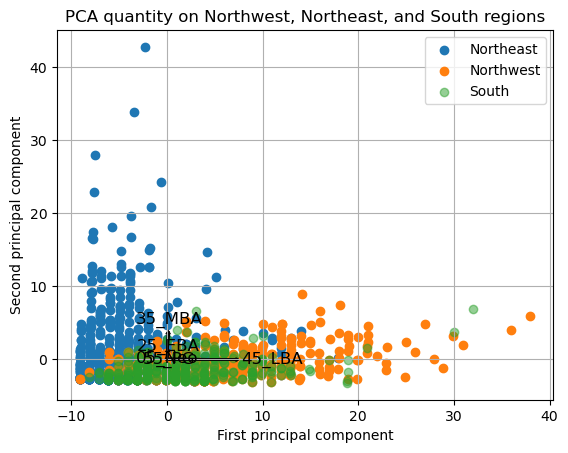

In [54]:
#PCA
pca_combined = PCA(n_components=2)
principal_components_combined = pca_combined.fit_transform(combined_data_q)

#transform seperate regions using combined PCA model
principal_components_q_nw = pca_combined.transform(Quantity_per_Chrono_nw)
principal_components_q_ne = pca_combined.transform(Quantity_per_Chrono_ne)
principal_components_q_s = pca_combined.transform(Quantity_per_Chrono_s)

#principal dataframes
principal_df_q_nw = pd.DataFrame(data=principal_components_q_nw, columns=['PC1', 'PC2'])
principal_df_q_ne = pd.DataFrame(data=principal_components_q_ne, columns=['PC1', 'PC2'])
principal_df_q_s = pd.DataFrame(data=principal_components_q_s, columns=['PC1', 'PC2'])

#function for base vectors
def plot_pca_arrows(pca, columns, ax):
    feature_vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i, v in enumerate(columns):
        ax.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], head_width=0.1, head_length=0.1, linewidth=2, fc='black', ec='black')
        ax.text(feature_vectors[i, 0] * 1.5, feature_vectors[i, 1] * 1.5, v, color='black', ha='center', va='center', fontsize=12)

fig, ax = plt.subplots()
ax.scatter(principal_df_q_ne['PC1'], principal_df_q_ne['PC2'], label='Northeast')
ax.scatter(principal_df_q_nw['PC1'], principal_df_q_nw['PC2'], label='Northwest')
ax.scatter(principal_df_q_s['PC1'], principal_df_q_s['PC2'], label='South', alpha=0.5)
#, alpha=0.5 for 
ax.set_title('PCA quantity on Northwest, Northeast, and South regions')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.grid(True)
ax.legend()
plot_pca_arrows(pca_combined, time_period_columns, ax)

plt.show()


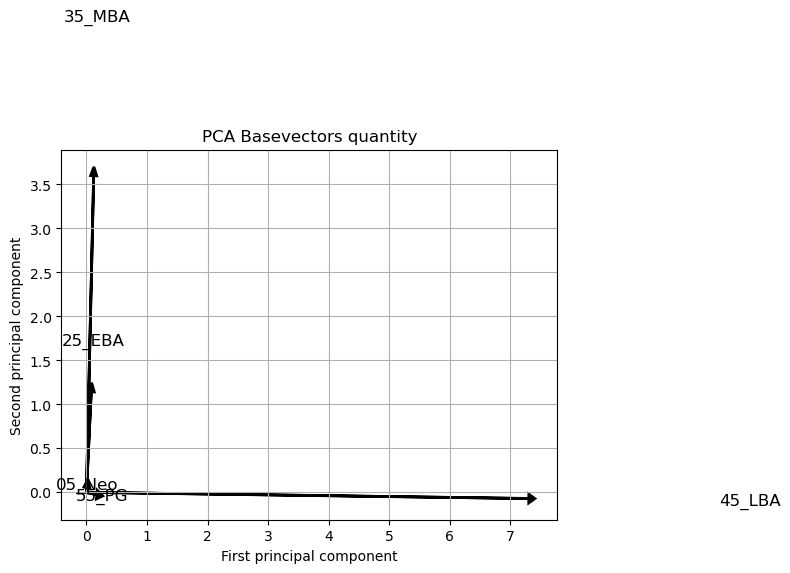

In [37]:
fig, ax = plt.subplots()


plot_pca_arrows(pca_combined, time_period_columns, ax)
ax.set_title('PCA Basevectors quantity')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.grid(True)

plt.show()

In [38]:
explained_variance_ratio = pca_combined.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


Explained variance ratio: [0.7555154  0.20178004]


In [39]:
loadings = pd.DataFrame(pca_combined.components_.T, columns=['PC1', 'PC2'], index=time_period_columns)
print(loadings)


             PC1       PC2
05_Neo  0.001106  0.013573
25_EBA  0.010807  0.303067
35_MBA  0.016329  0.952664
45_LBA  0.999532 -0.018692
55_PG   0.023485 -0.006933


c:\Users\jelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


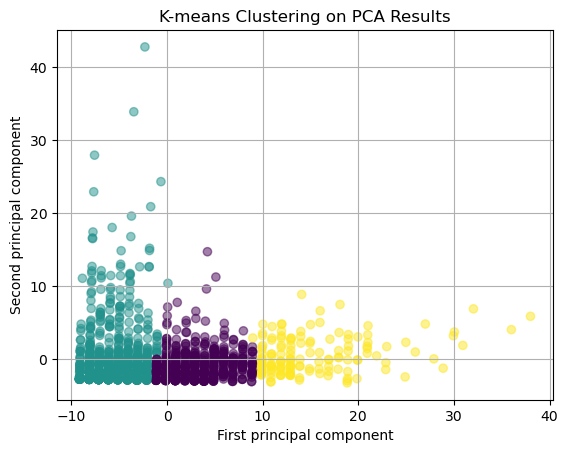

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(principal_components_combined)
labels = kmeans.labels_

plt.scatter(principal_components_combined[:, 0], principal_components_combined[:, 1], c=labels, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K-means Clustering on PCA')
plt.grid(True)
plt.show()


In [41]:
correlations = pd.DataFrame(np.corrcoef(combined_data_q.T, principal_components_combined.T)[:len(time_period_columns), len(time_period_columns):], 
                            index=time_period_columns, 
                            columns=['PC1', 'PC2'])
print(correlations)


             PC1       PC2
05_Neo  0.027420  0.173951
25_EBA  0.041543  0.602056
35_MBA  0.032855  0.990588
45_LBA  0.999951 -0.009664
55_PG   0.260677 -0.039768


In [42]:
f_val, p_val = f_oneway(principal_df_q_nw['PC1'], principal_df_q_ne['PC1'], principal_df_q_s['PC1'])
print(f"ANOVA results for PC1: F-value = {f_val}, p-value = {p_val}")

f_val, p_val = f_oneway(principal_df_q_nw['PC2'], principal_df_q_ne['PC2'], principal_df_q_s['PC2'])
print(f"ANOVA results for PC2: F-value = {f_val}, p-value = {p_val}")


ANOVA results for PC1: F-value = 403.5826459863266, p-value = 5.600117267832448e-138
ANOVA results for PC2: F-value = 38.04793274637312, p-value = 8.455954280099304e-17


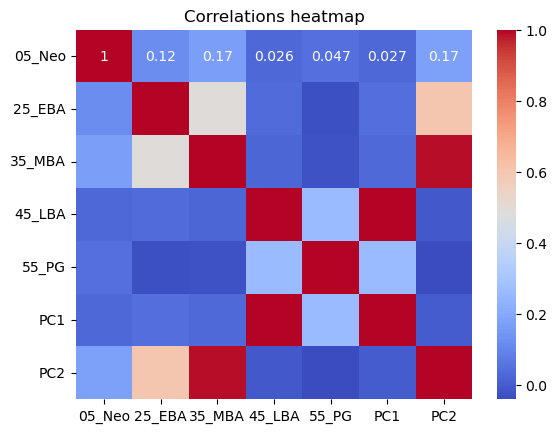

In [43]:
combined_df = pd.DataFrame(combined_data_q, columns=time_period_columns)
combined_df['PC1'] = principal_components_combined[:, 0]
combined_df['PC2'] = principal_components_combined[:, 1]

sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlations heatmap')
plt.show()


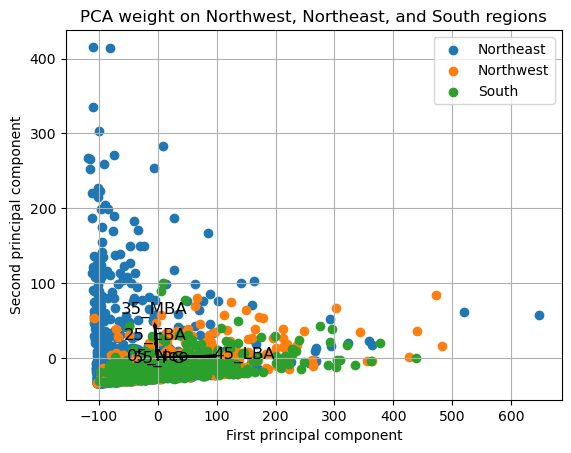

In [44]:
#PCA
pca_combined = PCA(n_components=2)
principal_components_combined = pca_combined.fit_transform(combined_data_w)

#transform seperate regions using combined PCA model
principal_components_w_nw = pca_combined.transform(Weight_per_Chrono_nw)
principal_components_w_ne = pca_combined.transform(Weight_per_Chrono_ne)
principal_components_w_s = pca_combined.transform(Weight_per_Chrono_s)

#principal dataframes
principal_df_w_nw = pd.DataFrame(data=principal_components_w_nw, columns=['PC1', 'PC2'])
principal_df_w_ne = pd.DataFrame(data=principal_components_w_ne, columns=['PC1', 'PC2'])
principal_df_w_s = pd.DataFrame(data=principal_components_w_s, columns=['PC1', 'PC2'])

#function for base vectors
def plot_pca_arrows(pca, columns, ax):
    feature_vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i, v in enumerate(columns):
        ax.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], head_width=0.1, head_length=0.1, linewidth=2, fc='black', ec='black')
        ax.text(feature_vectors[i, 0] * 1.5, feature_vectors[i, 1] * 1.5, v, color='black', ha='center', va='center', fontsize=12)

fig, ax = plt.subplots()
ax.scatter(principal_df_w_ne['PC1'], principal_df_w_ne['PC2'], label='Northeast')
ax.scatter(principal_df_w_nw['PC1'], principal_df_w_nw['PC2'], label='Northwest')
ax.scatter(principal_df_w_s['PC1'], principal_df_w_s['PC2'], label='South')
ax.set_title('PCA weight on Northwest, Northeast, and South regions')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.grid(True)
ax.legend()
plot_pca_arrows(pca_combined, time_period_columns, ax)

plt.show()


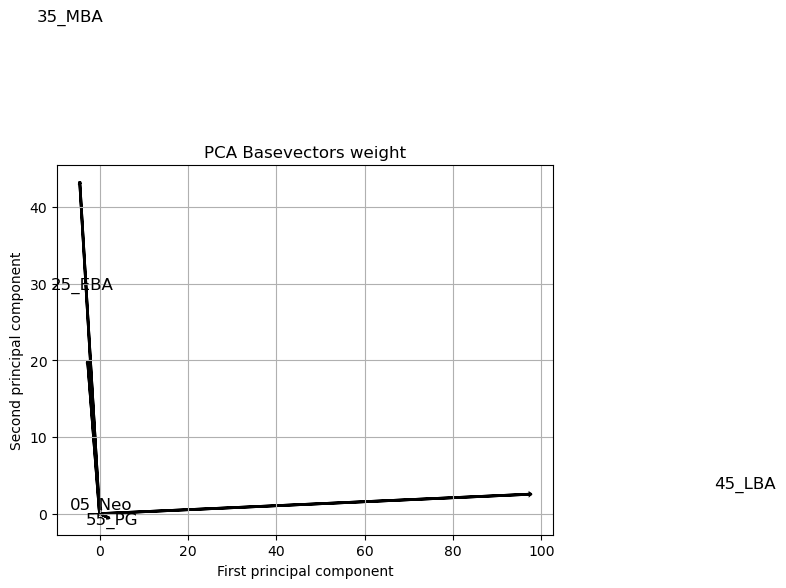

In [45]:
fig, ax = plt.subplots()


plot_pca_arrows(pca_combined, time_period_columns, ax)
ax.set_title('PCA Basevectors weight')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.grid(True)

plt.show()

In [46]:
explained_variance_ratio = pca_combined.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


Explained variance ratio: [0.73368342 0.17426701]


In [47]:
loadings = pd.DataFrame(pca_combined.components_.T, columns=['PC1', 'PC2'], index=time_period_columns)
print(loadings)

             PC1       PC2
05_Neo  0.001649  0.015905
25_EBA -0.027546  0.417077
35_MBA -0.045856  0.907102
45_LBA  0.998372  0.053355
55_PG   0.019738 -0.010604


c:\Users\jelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


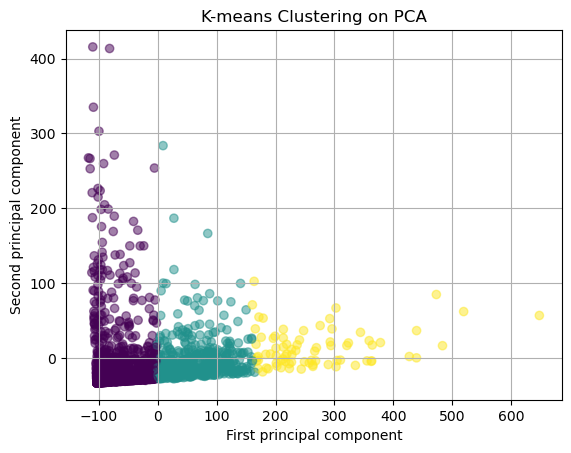

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(principal_components_combined)
labels = kmeans.labels_

plt.scatter(principal_components_combined[:, 0], principal_components_combined[:, 1], c=labels, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K-means Clustering on PCA')
plt.grid(True)
plt.show()


In [49]:
correlations = pd.DataFrame(np.corrcoef(combined_data_w.T, principal_components_combined.T)[:len(time_period_columns), len(time_period_columns):], 
                            index=time_period_columns, 
                            columns=['PC1', 'PC2'])
print(correlations)


             PC1       PC2
05_Neo  0.024873  0.116912
25_EBA -0.079119  0.583840
35_MBA -0.099053  0.954945
45_LBA  0.999655  0.026037
55_PG   0.123312 -0.032286


In [50]:
f_val, p_val = f_oneway(principal_df_w_nw['PC1'], principal_df_w_ne['PC1'], principal_df_w_s['PC1'])
print(f"ANOVA results for PC1: F-value = {f_val}, p-value = {p_val}")

f_val, p_val = f_oneway(principal_df_w_nw['PC2'], principal_df_w_ne['PC2'], principal_df_w_s['PC2'])
print(f"ANOVA results for PC2: F-value = {f_val}, p-value = {p_val}")


ANOVA results for PC1: F-value = 176.58121053203158, p-value = 8.2349035254737e-69
ANOVA results for PC2: F-value = 24.348477275495142, p-value = 4.100076751891302e-11


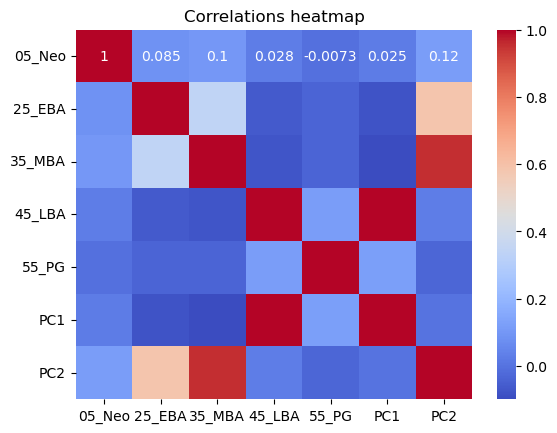

In [51]:
combined_df = pd.DataFrame(combined_data_w, columns=time_period_columns)
combined_df['PC1'] = principal_components_combined[:, 0]
combined_df['PC2'] = principal_components_combined[:, 1]

sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlations heatmap')
plt.show()
